<h1>STUDENTS PERFORMANCE IN EXAMS - DATA ANALYSIS </h1>

This script is my training work. 

Data come from <url>https://www.kaggle.com/spscientist/students-performance-in-exams</url>.

I would be grateful for any feedback.

12.07.2021

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
from scipy import stats
 
students_result = pd.read_excel("StudentsPerformance.xlsx", sheet_name="StudentsPerformance", header=0)
students_result["overall_score"]=students_result["math_score"]+students_result["reading_score"]+students_result["writing_score"]
students_result.head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


<h2>BASIC INSIGHT OF DATA</h2>

In [3]:
students_result.dtypes

gender                         object
race/ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
overall_score                   int64
dtype: object

In [4]:

students_result.describe(include ='all') # basic statistics

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000,203.312000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657,42.771978
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000,27.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000,175.000000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000,205.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000,233.000000


In [5]:
students_result.nunique()

gender                           2
race/ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                      81
reading_score                   72
writing_score                   77
overall_score                  194
dtype: int64

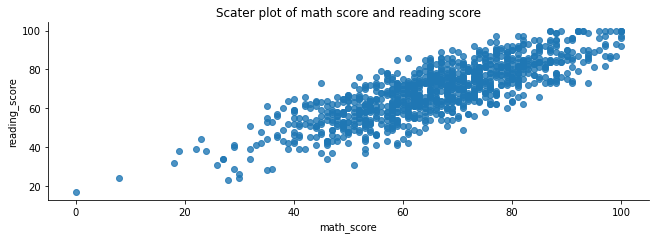

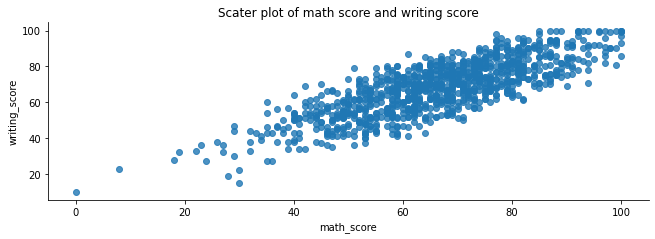

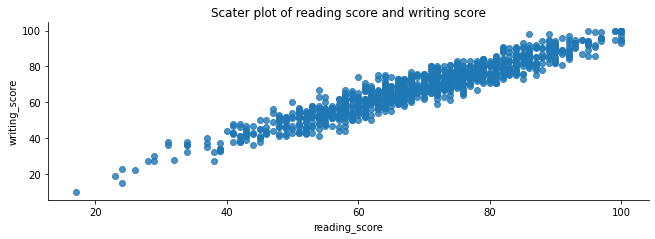

In [6]:
#scater plot

sct_plot1=sns.lmplot(x='math_score', y='reading_score',data=students_result, fit_reg=False, 
legend=False, height=3, aspect=3)
sct_plot1.set(title='Wykres rozrzutu punktów z matematyki i czytania')

sct_plot2=sns.lmplot(x='math_score', y='writing_score',data=students_result, fit_reg=False, 
legend=False, height=3, aspect=3)
sct_plot2.set(title='Wykres rozrzutu punktów z matematyki i pisania')

sct_plot3=sns.lmplot(x='reading_score', y='writing_score',data=students_result, fit_reg=False, 
legend=False, height=3, aspect=3)
sct_plot3.set(title='Wykres rozrzutu punktów z czytania i pisania')



From plot we can see that it is justified to count Pearson correlation.

In [8]:
correlation = students_result.corr(method='pearson')
correlation

,math_score,reading_score,writing_score,overall_score
math_score,1.000000,0.817580,0.802642,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667
overall_score,0.918746,0.970331,0.965667,1.000000


As can be noticed number of scores of one exam correlate with the result of another exam. Reading score correlates stronger with writing score than math score correlates with one of both. Correlation is positive and it means that the higher score in one exam the higher in another.

Visually it can be seen on belows plots.

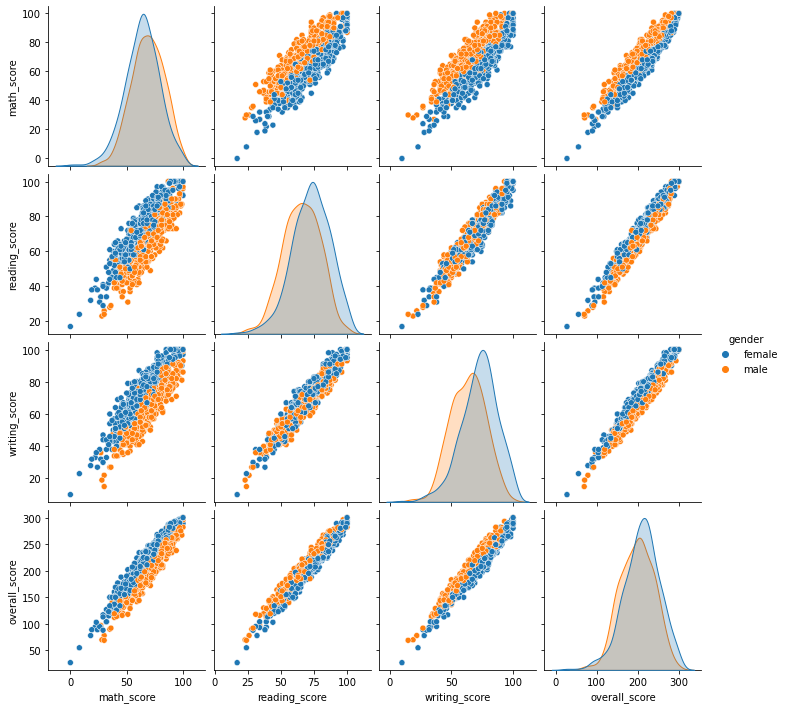

In [9]:
sns.pairplot(students_result, hue='gender')

I made belows relation plots only to practice. Above pair plot should be enough in this case to come to the conclusion I came.

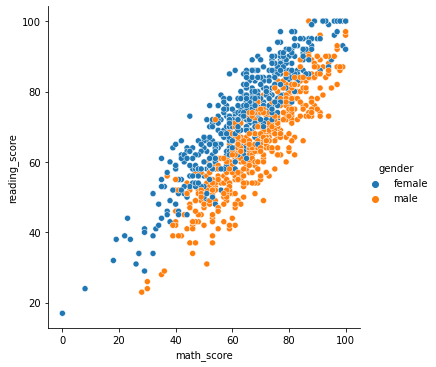

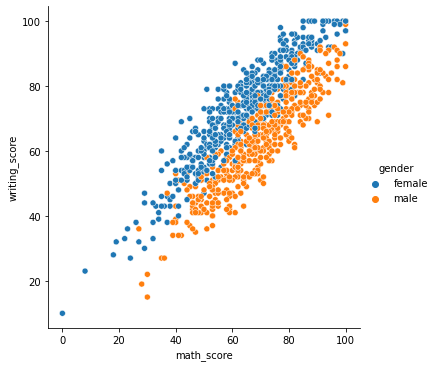

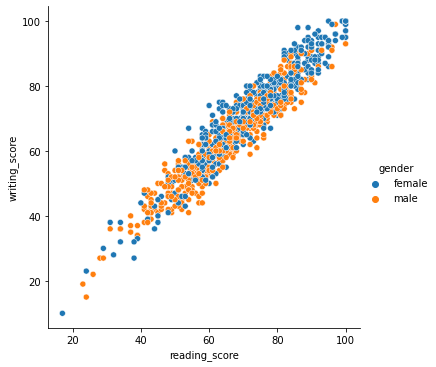

In [10]:

sns.relplot(x='math_score', y='reading_score', hue='gender', data=students_result)
sns.relplot(x='math_score', y='writing_score', hue='gender', data=students_result)
sns.relplot(x='reading_score', y='writing_score', hue='gender', data=students_result)

In the first two plots we can easily separate two grup of observation with respect to gender. It means that in general boys had better results in math exam that in writing/reading tests in contrast to girls. From the last plot is clear that there is no differences in scores if we compare results writing - reading tests with respect to gender.

Also distributions confirm hypothesis that female students have slightly better results in reading and writing exams than male students. The opposite tendency is seen in math exam results. Girls seem to have overall scores higher too.

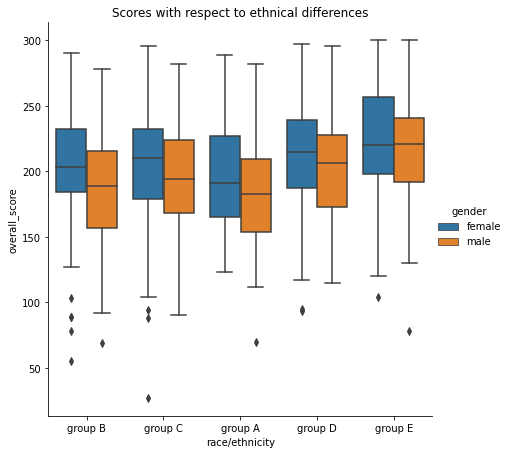

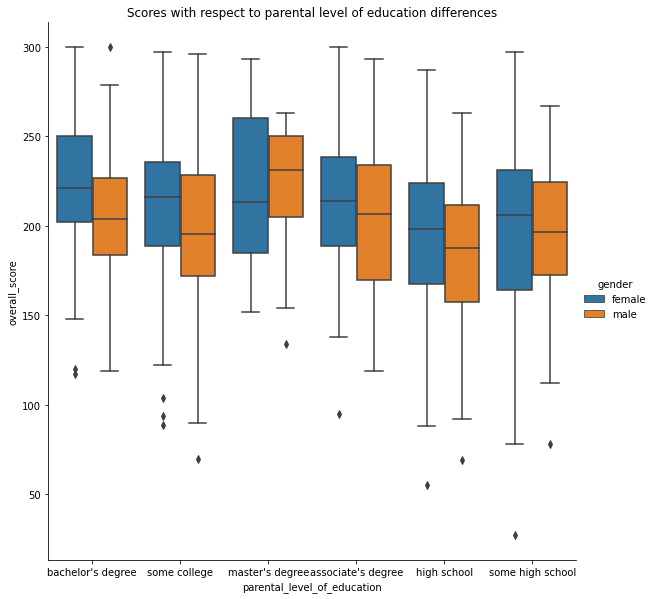

In [11]:

boxplot1=sns.catplot(x="race/ethnicity", y="overall_score", hue="gender", kind="box", data=students_result, height=6)
boxplot1.set(title='Scores with respect to ethnical differences')

boxplot2=sns.catplot(x="parental_level_of_education", y="overall_score", hue="gender", kind="box", data=students_result, height=8)
boxplot2.set(title='Scores with respect to parental level of education differences')


The race/ethnicity belongings does not seem to have great impact on exam scores. Observations are scattered (long whiskers). Only students from group E achieve better scores than students from different groups. 

Students whose parents have higher education have slightly better results. 

In both cases differences with respect to gender are not big. In examined factors gender does not have an impact.

The question is if parental level of education has any significant effect on tests results is it this factor alone or concomitance with other coefficients?

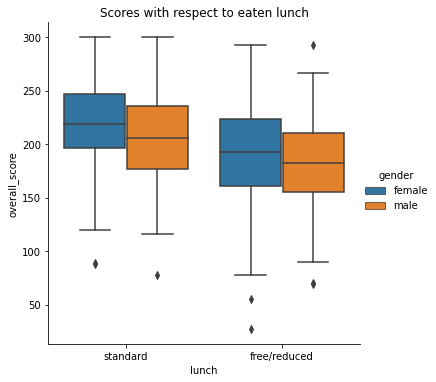

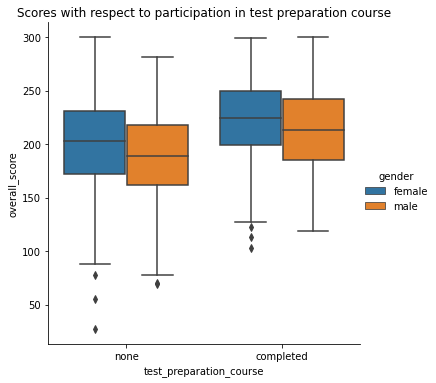

In [12]:

boxplot3=sns.catplot(x="lunch", y="overall_score", hue="gender", kind="box", data=students_result, height=5)
boxplot3.set(title='Scores with respect to eaten lunch')

boxplot4=sns.catplot(x="test_preparation_course", y="overall_score", hue="gender", kind="box", data=students_result, height=5)
boxplot4.set(title='Scores with respect to participation in test preparation course')

Students who ate lunch before exam have better results which is consistent with assumptions. There is no surprise that students who participated in test preparation course performanced better.


<h3>ANOVA</h3>
In order to examine what affect the results we use analyses of variance. From introductories plots we could assume that on overall scores following factors might have the greatest impact: parents' educational backgrounds, eaten lunch and preparation course. 
<h4>Assumptions</h4>
Before we use ANOVA let's check main assumptions - normality and homogeneity of variance in each group.

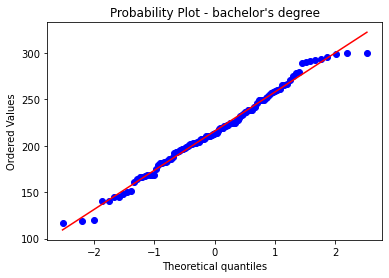

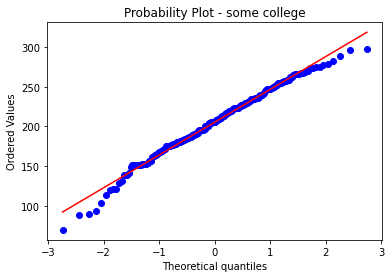

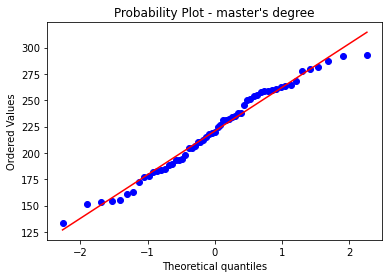

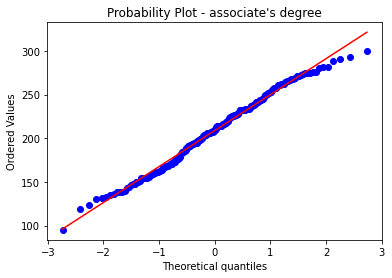

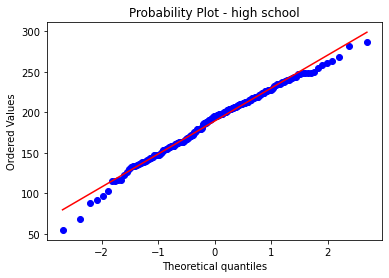

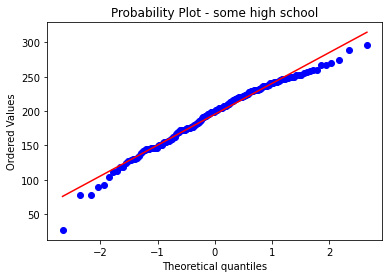

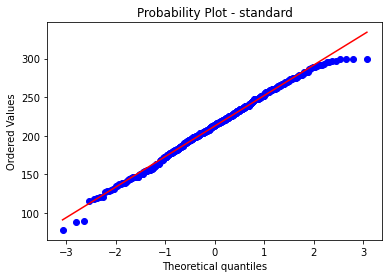

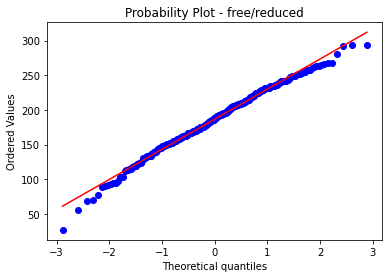

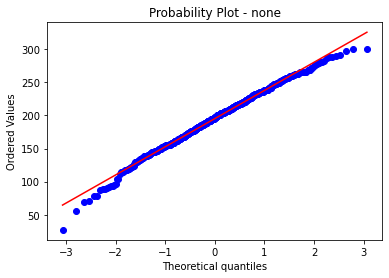

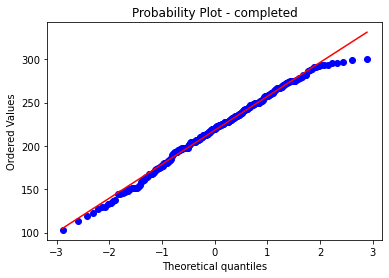

In [8]:
#anova assumpt
#normality

unique_parental_level_of_education = students_result['parental_level_of_education'].unique()
for edu_lev in unique_parental_level_of_education:
    stats.probplot(students_result[students_result['parental_level_of_education'] == edu_lev]['overall_score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  edu_lev)
    plt.show()
    
unique_lunch = students_result['lunch'].unique()
for lunch in unique_lunch:
    stats.probplot(students_result[students_result['lunch'] == lunch]['overall_score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  lunch)
    plt.show()
    
unique_test_preparation_course = students_result['test_preparation_course'].unique()
for test_prep in unique_test_preparation_course:
    stats.probplot(students_result[students_result['test_preparation_course'] == test_prep]['overall_score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  test_prep)
    plt.show()

The Q-Q plots show that blue points fit quite well the red line and it means that there is no proofs against normality in each group.

In [15]:
#homogeneity 
ratio1 = students_result.groupby('parental_level_of_education').std().max() / students_result.groupby('parental_level_of_education').std().min()
print('ratio1\n',ratio1)

ratio2 = students_result.groupby('lunch').std().max() / students_result.groupby('lunch').std().min()
print('ratio2\n',ratio2)

ratio3 = students_result.groupby('test_preparation_course').std().max() / students_result.groupby('test_preparation_course').std().min()
print('ratio3\n',ratio3)

ratio1
 math_score       1.112842
reading_score    1.123710
writing_score    1.146058
overall_score    1.109062
dtype: float64
ratio2
 math_score       1.110335
reading_score    1.076984
writing_score    1.076316
overall_score    1.096449
dtype: float64
ratio3
 math_score       1.051761
reading_score    1.060528
writing_score    1.121442
overall_score    1.088191
dtype: float64


The ratios of the largest to the smallest sample standard deviation are less than 2 and it let us accept that homogeneity assumption is fulfilled.

Now we can build a linear model and perform ANOVA to examine if means in every groups are equal. Since we use three-way ANOVA with interactions we test following hypothesises:
<ol>
    <li>There is no difference in group means at any level of the first independent variable - parental_level_of_education.</li>
    <li>There is no difference in group means at any level of the second independent variable - lunch.</li>
    <li>There is no difference in group means at any level of the third independent variable - test_preparation_course.</li>
    <li>The effect of one independent variable does not depend on the effect of the other independent variable (a.k.a. no interaction effect)(here we examine 4 effects 1-2, 1-3, 2-3, 1-2-3). 
</ol>

In [29]:
model = smf.ols(formula='overall_score ~ parental_level_of_education * lunch * test_preparation_course', data=students_result)
model_fit = model.fit()

# print summary of linear regression
#print(model_fit.summary())
# show anova table
print(sm.stats.anova_lm(model_fit, type=2))



                                                       df        sum_sq  \
parental_level_of_education                           5.0  9.378331e+04   
lunch                                                 1.0  1.582134e+05   
test_preparation_course                               1.0  1.207268e+05   
parental_level_of_education:lunch                     5.0  7.792075e+03   
parental_level_of_education:test_preparation_co...    5.0  2.671319e+03   
lunch:test_preparation_course                         1.0  8.827884e+02   
parental_level_of_education:lunch:test_preparat...    5.0  8.561144e+03   
Residual                                            976.0  1.434982e+06   

                                                          mean_sq           F  \
parental_level_of_education                          18756.661749   12.757306   
lunch                                               158213.446045  107.608559   
test_preparation_course                             120726.780427   82.112079   


There is no interaction effect between any combination of variables. However there are significant differences of means in all groups. It means that participating in preparation cours, eaten lunch and parental level of education have impact on students results. 

Let's do post hoc test to check in which groups of parental_level_of_education group there are differences.

In [24]:
tukey = pairwise_tukeyhsd(students_result['overall_score'], students_result['parental_level_of_education'], alpha = 0.05/15)
print(tukey)

            Multiple Comparison of Means - Tukey HSD, FWER=0.00             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree    7.064 0.6516 -10.4507 24.5786  False
associate's degree       high school -19.4164  0.001 -34.4847 -4.3481   True
associate's degree   master's degree  12.0894 0.3573 -10.4286 34.6074  False
associate's degree      some college   -3.278    0.9 -17.8054 11.2494  False
associate's degree  some high school -13.3832 0.0183 -28.8268  2.0604  False
 bachelor's degree       high school -26.4804  0.001 -44.3937 -8.5671   True
 bachelor's degree   master's degree   5.0254    0.9 -19.4877 29.5386  False
 bachelor's degree      some college  -10.342 0.2477 -27.8028  7.1188  False
 bachelor's degree  some high school -20.4472  0.001 -38.6773  -2.217   True
       high school   master's degree  31.5058  0.001   8.6763 54.3353   True

Tukey test shows that students who's parents graduated only high school have significantly worse results than students from other group. Also students who's parents graduated some high school have different scores than ones who's parents have bachelor's or master's degree.

<h3>SUMMARY</h3>

<ol>
    <li>Scores in three tests are positively correlated - students who performed well in one of the test also had good results in other tests.</li>
    <li>Female students obtained better results in writting and reading test, male students performed better in math test. However girls had higher overall scores than boys.</li>
    <li>Lunch eaten before exams, taking part in preparation course and higher education of srudents' parents had positive impact on students results.</li>
</ol>